In [11]:
import numpy as np
import property_and_mortgage as pm
import balance_sheet as bs

# Plot the figures inline and not in a pop-up
%matplotlib inline

+------------------+
|      Income      |
+-------+----------+
| Item  |   Amount |
+-------+----------+
| Other |    $5.00 |
| Rent  | $5500.00 |
|       |          |
| Total | $5505.00 |
+-------+----------+
+---------------------------------+
|             Expenses            |
+----------------------+----------+
| Item                 |   Amount |
+----------------------+----------+
| Property insurance   |   $83.33 |
| Mortgage insurance   |   $83.33 |
| HOA                  |   $83.33 |
| Property tax         |  $216.67 |
| Capital expenditures |  $227.78 |
| Vacancy              |  $275.25 |
| Property management  |  $550.50 |
| Mortgage             | $2449.43 |
|                      |          |
| Total                | $3969.62 |
+----------------------+----------+
+------------------------+
|  Capital Expenditures  |
+--------------+---------+
| Item         |  Amount |
+--------------+---------+
| Water heater |  $16.67 |
| Paint        |  $27.78 |
| Heat/AC      |  $44.44 

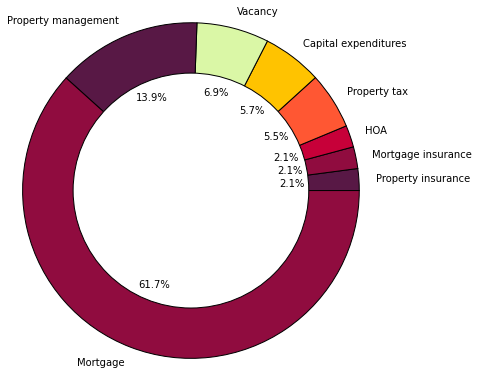


Capital expenditures: $227.78


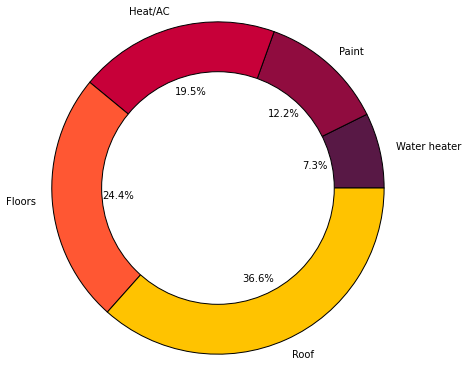

In [14]:
# Mortgage-related parameters.
mortgage_parameters = {
    'principal_loan_amount': 300000.00,
    'loan_down_payment':     100000.00,
    'annual_interest_rate':     0.0525,
    'mortgage_term_in_years':     15.0
}

# Property-related parameters.
property_parameters = {
    'initial_property_value': 400000.00,
    'annual_appreciation_rate':    0.02
}

########## 0. One-time costs
one_time_costs = {
    'Closing costs':  5000.00,
    'Rehab budget':  20000.00,
    'Miscellaneous':  1000.00
}

########## 1. Monthly Income
monthly_income = {
    'Rent':  5500.00,
    'Other':    5.00
}

########## 2. Annual Expenses
annual_expenses = {
    'Property tax':       2600.00,
    'Property insurance': 1000.00,
    'HOA':                1000.00,
    'Mortgage insurance': 1000.00
}

########## 2. Monthly Expenses
monthly_expenses = {
    'Utilies':   0.0,
    'Lawn care': 0.0,
}

########## 2. Periodic Expenses: Capital Expenditures
# The format is ('name', period in years, dollar amount)
capital_expenditures = {
    'Roof':         (30, 30000.00),
    'Water heater': (20,  4000.00),
    'Paint':        ( 3,  1000.00),
    'Floors':       (15, 10000.00),
    'Heat/AC':      (15,  8000.00)
}

########## 2. Expenses Proportional to Rent
proportional_expenses = {
    'Vacancy':             0.05,
    'Property management': 0.10
}

# Instantiate the mortgage.
mortgage_ = pm.mortgage(
    mortgage_parameters['principal_loan_amount'],
    mortgage_parameters['loan_down_payment'],
    mortgage_parameters['annual_interest_rate'],
    mortgage_parameters['mortgage_term_in_years'])

# Instantiate balance sheet.
balance_sheet_ = bs.balance_sheet(mortgage_)
balance_sheet_.add_one_time_costs(one_time_costs)
balance_sheet_.add_monthly_income(monthly_income)
balance_sheet_.add_annual_expenses(annual_expenses)
balance_sheet_.add_monthly_expenses(monthly_expenses)
balance_sheet_.add_expenses_proportional_to_rent(proportional_expenses)
balance_sheet_.add_capital_expenditures(capital_expenditures)

# Instantiate investment property.
investment_property_ = pm.investment_property(
    mortgage_, balance_sheet_,
    property_parameters['initial_property_value'],
    property_parameters['annual_appreciation_rate'])

# Print the balance sheet statements and plots.
investment_property_.balance_sheet_.print_statement()
investment_property_.balance_sheet_.plot_expenses()
investment_property_.balance_sheet_.plot_capital_expenditures()

Mortgage with minimum payments.
Mimimum required monthly payment: $2449.43
Total monthly payment: $2449.43
Years until paid off: 15


//anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


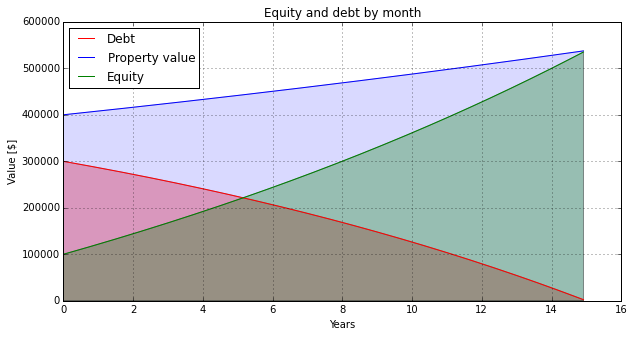

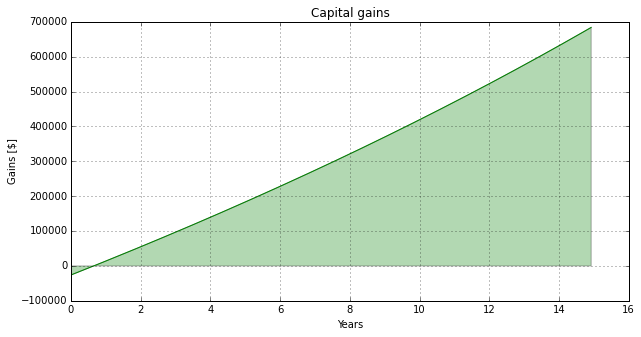

Mortgage with additional monthly payment
Mimimum required monthly payment: $2449.43
Total monthly payment: $3449.43
Years until paid off:  9


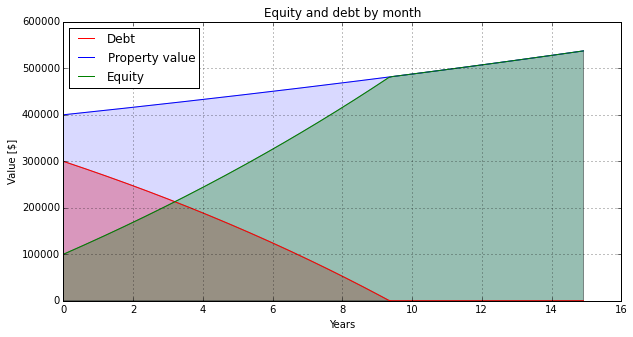

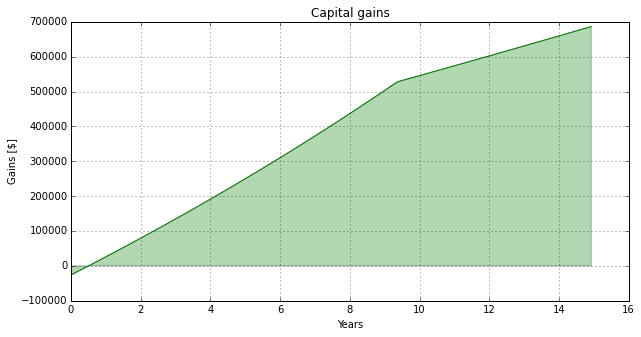

In [15]:
# Mortgage with no additional payments.
print('Mortgage with minimum payments.')
additional_monthly_payment_ = 0.0
mortgage_.print_mortgage(additional_monthly_payment_)
investment_property_.plot_equity_and_debt(additional_monthly_payment_)
investment_property_.plot_gains(additional_monthly_payment_)

# Mortgage with additional payments.
print('Mortgage with additional monthly payment')
additional_monthly_payment_ = 1000.0
mortgage_.print_mortgage(additional_monthly_payment_)
investment_property_.plot_equity_and_debt(additional_monthly_payment_)
investment_property_.plot_gains(additional_monthly_payment_)